Data understanding and cleaning

In [75]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from coresets import *
from sklearn.preprocessing import StandardScaler



#reading data

df=pd.read_csv("credit.csv")
df.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
# shape of data

df.shape

(8950, 18)

In [77]:


# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [78]:
# checking null values
df.isnull().sum()

# # dropping null values
df=df.dropna()
df.shape


(8636, 18)

In [79]:
#checking for ouliers
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [80]:
# checking unique values

for i in df.columns:
    print(f'Unique Values of {i.title()}: {df[i].unique()}')


Unique Values of Cust_Id: ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Unique Values of Balance: [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
Unique Values of Balance_Frequency: [0.818182 0.909091 1.       0.545455 0.875    0.454545 0.636364 0.727273
 0.5      0.888889 0.272727 0.363636 0.666667 0.75     0.857143 0.090909
 0.333333 0.181818 0.6      0.3      0.9      0.833333 0.8      0.2
 0.777778 0.555556 0.25     0.571429 0.4      0.444444 0.       0.714286
 0.1      0.625    0.428571 0.7      0.375    0.166667 0.222222 0.285714
 0.142857 0.125   ]
Unique Values of Purchases: [  95.4     0.    773.17 ...  291.12  144.4  1093.25]
Unique Values of Oneoff_Purchases: [   0.    773.17   16.   ...  255.62  734.4  1093.25]
Unique Values of Installments_Purchases: [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
Unique Values of Cash_Advance: [   0.       6442.945483  346.81139  ... 8555.409326   36.558778
  127.040008]
Unique Values of 

In [81]:


le = LabelEncoder()

#changing object to float type

x=df
# encoder 


x['CUST_ID'] = le.fit_transform(x['CUST_ID'])


x=x.astype(float)
x.head(10)
# for i in x.columns:
#   print(f'Unique Values of {i.title()}: {x[i].unique()}')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,1.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
4,3.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,4.0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0
6,5.0,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0
7,6.0,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0
8,7.0,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0
9,8.0,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0
10,9.0,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0.0,12.0,1200.0,1083.301007,2172.697765,0.000000,12.0


In [82]:
# scaling the data usinf min max scaler
y=x
cols = y.columns
ms = StandardScaler()

y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=[cols])
y.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.731850,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,-1.731449,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,-1.731048,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-1.730647,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,-1.730246,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [83]:
# applying kmeans on full data

cost_full={}

cost=[]
time_=[]

for i in range(25):
  t0= time.time()
  kmeans = KMeans(n_clusters=100, init='k-means++', max_iter=5,n_init=1).fit(y)
  t1=time.time()-t0
  cost.append(kmeans.inertia_)
  time_.append(t1)

cost_full[100]= [sum(cost)/len(cost), sum(time_)/len(time_)]

# for k=500
cost=[]
time_=[]
for i in range(25):
   t0= time.time()
   kmeans = KMeans(n_clusters=200, init='k-means++', max_iter=5,n_init=1).fit(y)
   t1=time.time()-t0
   cost.append(kmeans.inertia_)
   time_.append(t1)

cost_full[200]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_full)

 


{100: [30128.506158305016, 0.07113561630249024], 200: [22715.80191618226, 0.1598419189453125]}


In [84]:
# applying k-means on lightweight coreset

from sklearn.cluster import KMeans

centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_lightweight={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=lightweight(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5,n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0
            cost.append(kmeans.inertia_)
            time_.append(t1)
        
        cost_lightweight[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]

print(cost_lightweight)




{(100, 1000): [29245.216101874874, 0.028441095352172853], (100, 2000): [30567.320474379627, 0.040584230422973634], (100, 3000): [30496.16093648451, 0.04621316909790039], (100, 4000): [30138.95622414148, 0.04765275001525879], (100, 5000): [29727.067003158438, 0.060563879013061525], (200, 1000): [18968.729484554322, 0.053682413101196286], (200, 2000): [22133.153244713467, 0.06723883628845215], (200, 3000): [22857.344977416702, 0.0815750503540039], (200, 4000): [22939.84494675891, 0.09344273567199707], (200, 5000): [23027.617264259403, 0.1089552879333496]}


In [85]:
# applying kmeans on uniform coreset
centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_uniform={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=uniform(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5, n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0  
            cost.append(kmeans.inertia_)
            time_.append(t1)
        cost_uniform[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_uniform)


{(100, 1000): [21596.20269482788, 0.027714672088623046], (100, 2000): [25405.58775724482, 0.032082128524780276], (100, 3000): [27036.723257177426, 0.03808974266052246], (100, 4000): [28191.23050286548, 0.04261399269104004], (100, 5000): [28750.98448430489, 0.050586423873901366], (200, 1000): [12506.0483490769, 0.049898290634155275], (200, 2000): [17060.80588281946, 0.06457858085632324], (200, 3000): [19209.55224931119, 0.07373966217041016], (200, 4000): [20231.405950340788, 0.08802136421203613], (200, 5000): [21105.4167377888, 0.09947460174560546]}


In [86]:
x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]

for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(value[0])
    else:
        y_axis_200_light.append(value[0])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(value[0])
    else:
        y_axis_200_uni.append(value[0])

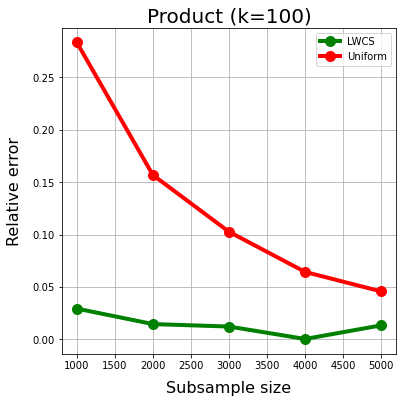

In [87]:
# plotting of relative error for k=100


# finding relative error
for i in range(len(x_axis)):
    y_axis_100_light[i]=abs(y_axis_100_light[i]-cost_full[100][0])/cost_full[100][0]
    y_axis_100_uni[i]=abs(y_axis_100_uni[i]-cost_full[100][0])/cost_full[100][0]


plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Product (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})


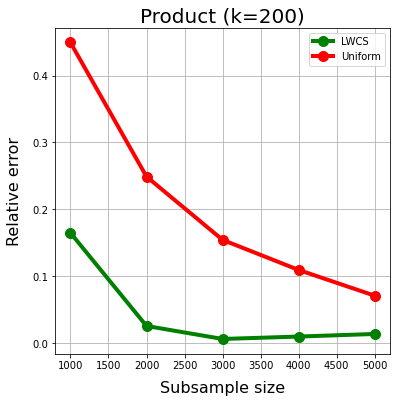

In [88]:
# plotting of relative error for k=250


# finding relative error
for i in range(len(x_axis)):
    y_axis_200_light[i]=abs(y_axis_200_light[i]-cost_full[200][0])/cost_full[200][0]
    y_axis_200_uni[i]=abs(y_axis_200_uni[i]-cost_full[200][0])/cost_full[200][0]




plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Product (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})


In [89]:
# plotting speedup for k=100

x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]

# finding speedup

for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(cost_full[100][1]/value[1])
    else:
        y_axis_200_light.append(cost_full[200][1]/value[1])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(cost_full[100][1]/value[1])
    else:
        y_axis_200_uni.append(cost_full[200][1]/value[1])

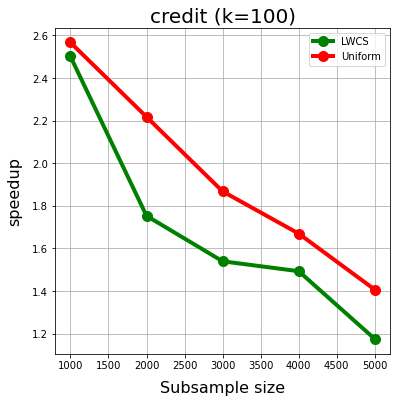

In [90]:
# plotting of speedup for k=100


plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('speedup', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('credit (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})

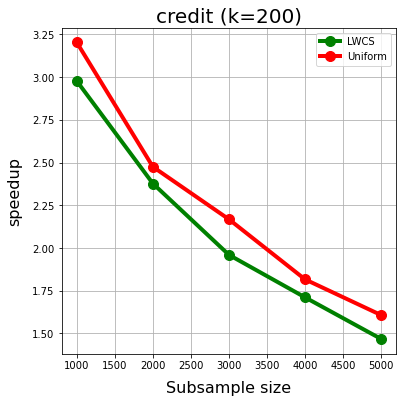

In [91]:
# plotting of speedup for k=200

plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('speedup', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('credit (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})